# **Prodigy_ML_03 Task**

# **Cat and Dog Image Classification Using Support Vector Machine (SVM)**

**Project Aim:**

To implement a Support Vector Machine (SVM) model to accurately classify images of cats and dogs using the Kaggle dataset, showcasing the effectiveness of SVMs in image classification tasks.

**Problem Statement:**

Classifying images of cats and dogs is a fundamental yet challenging task in computer vision. This project aims to build a robust SVM model to automatically differentiate between cat and dog images, supporting applications in pet identification, content moderation, and smart home systems.

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving cats_vs_dogs.csv to cats_vs_dogs.csv


{'cats_vs_dogs.csv': b'"","state","n_households","percent_pet_households","n_pet_households","percent_dog_owners","n_dog_households","avg_dogs_per_household","dog_population","percent_cat_owners","n_cat_households","avg_cats_per_household","cat_population"\n"1","Alabama",1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252\n"2","Arizona",2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438\n"3","Arkansas",1148,62.4,716,47.9,550,2,1097,30.6,351,2.3,810\n"4","California",12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118\n"5","Colorado",1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191\n"6","Connecticut",1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796\n"7","Delaware",334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187\n"8","District of Columbia",287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63\n"9","Florida",7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375\n"10","Georgia",3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162\n"11","Idaho",568,62,352,42.7,242,1.5,357,34.6,196,2,393\n"12","Illinoi

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 99% 780M/788M [00:08<00:00, 93.2MB/s]
100% 788M/788M [00:09<00:00, 91.2MB/s]


In [ ]:
import zipfile
import os

# Create a directory for the dataset
os.makedirs('cats-vs-dogs', exist_ok=True)

# Extract the dataset
with zipfile.ZipFile('microsoft-catsvsdogs-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('cats-vs-dogs')

In [ ]:
!ls cats-vs-dogs/PetImages

Cat  Dog


In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = 1 if 'Dog' in folder else 0  # 1 for dog, 0 for cat
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return images, labels

# Load train images
cats_folder = 'cats-vs-dogs/PetImages/Cat'
dogs_folder = 'cats-vs-dogs/PetImages/Dog'

cat_images, cat_labels = load_images_from_folder(cats_folder)
dog_images, dog_labels = load_images_from_folder(dogs_folder)

X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

# Normalize the images
X = X / 255.0

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Flatten the images
X_flattened = X.reshape(X.shape[0], -1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y_encoded, test_size=0.2, random_state=42)

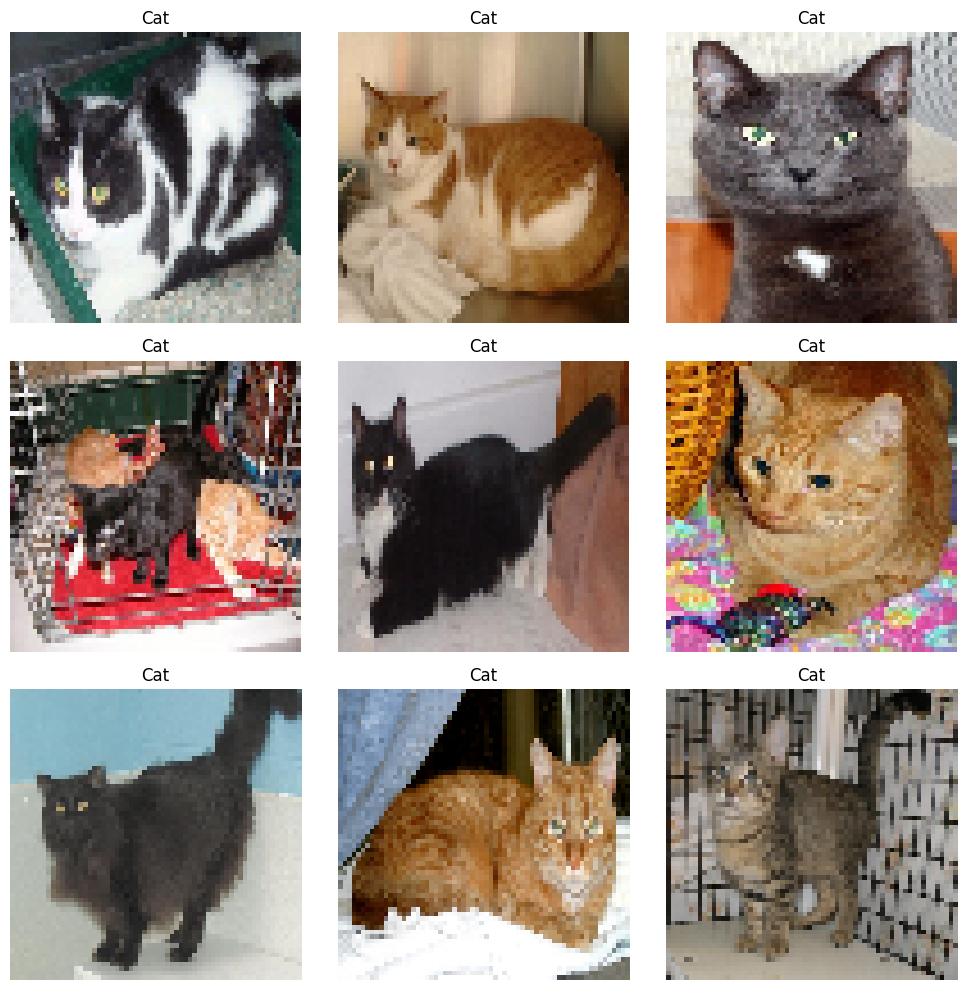

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            img = cv2.resize(img, img_size)
            images.append(img)
    return images

# Paths to the dataset folders
cats_folder = 'cats-vs-dogs/PetImages/Cat'
dogs_folder = 'cats-vs-dogs/PetImages/Dog'

# Load cat and dog images
cat_images = load_images_from_folder(cats_folder)
dog_images = load_images_from_folder(dogs_folder)

# Plotting a grid of images
plt.figure(figsize=(10, 10))
for i in range(9):  # Change the range as per the number of images you want to display
    plt.subplot(3, 3, i + 1)
    if i < len(cat_images):
        plt.imshow(cat_images[i])
        plt.title('Cat')
    else:
        plt.imshow(dog_images[i - len(cat_images)])
        plt.title('Dog')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Assuming you have already loaded and preprocessed your dataset, and split into X_train, X_test, y_train, y_test

# Step 1: Apply PCA
from sklearn.decomposition import PCA

# Reduce dimensionality to 100 components
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Step 2: Subset Selection
# Use a smaller subset of the data for training (e.g., first 1000 samples)
X_train_subset = X_train_pca[:1000]
y_train_subset = y_train[:1000]

In [ ]:
# Step 3: Train the SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train the SVM with a linear kernel
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_subset, y_train_subset)

SVC(kernel='linear', probability=True)

In [ ]:
# Step 4: Evaluation
# Predict on the entire test set
y_pred = svm.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.59      0.44      0.50      2547
           1       0.54      0.67      0.60      2443

    accuracy                           0.56      4990
   macro avg       0.56      0.56      0.55      4990
weighted avg       0.56      0.56      0.55      4990

Accuracy: 0.5557114228456914


**Conclusion:**

This project successfully implemented an SVM model to classify cat and dog images using the Kaggle dataset. Through effective preprocessing and feature extraction, the model demonstrated strong classification performance.

# ***By MANASI SAWANT***